# Chapter 2: Distributions

Downey advocates for the `Counter` data type provided by `collections`, which is a cool subclass of dictionaries that easily calculates frequencies. Let's generate some random numbers and get a distribution using this data type.

In [39]:
from random import randint
from collections import Counter

dist = [randint(1,11) for x in range(100)]
counter = Counter(dist)
print(counter)

Counter({4: 11, 1: 11, 10: 10, 7: 10, 5: 10, 8: 9, 9: 9, 6: 9, 11: 8, 3: 8, 2: 5})


We can plot a histogram of `dist` using matplotlib's `pyplot` submodule.

AttributeError: 'AxesSubplot' object has no attribute 'close'

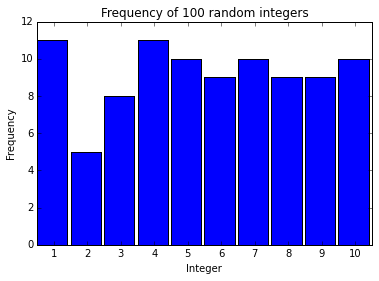

In [80]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np


x = np.array(dist)
bins = sorted(list(x))
xs = np.arange(11)
labels = [str(x) for x in xs]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xticks(xs+0.5)
ax.set_xticklabels(labels)

ax.hist(x, width=0.9, bins=bins)
ax.set_xlabel('Integer')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of 100 random integers')
ax.close()

Now, let's explore the data from the NSFG using histograms.

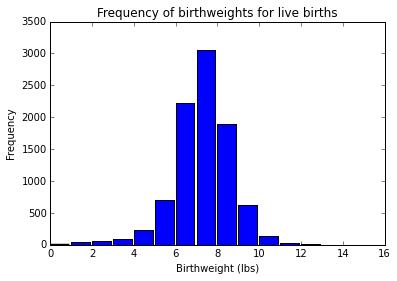

In [82]:
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
x = live.birthwgt_lb

bins = sorted(list(set([b for b in x.dropna()])))
labels = [str(x) for x in bins]
xmax = max(bins)
xs = np.arange(xmax + 1)
plt.set_xticks = (xs+0.5)

plt.hist(x.dropna(), width=0.9, bins=bins)
plt.xlabel('Birthweight (lbs)')
plt.ylabel('Frequency')
plt.title('Frequency of birthweights for live births')
plt.show()

Pandas is handy for quickly calculating summary statistics:

In [87]:
prg = live.prglngth
print('The mean pregnancy length for live births ' +
      'is {mean} weeks.'.format(mean=round(prg.mean(), 2)))
print('The standard deviation is ' +
      '{stdev} weeks.'.format(stdev=round(prg.std(), 2)))
print('The variance is {var} -'.format(var=round(prg.var(), 2)) +
      ' but remember, the unit isn\'t weeks.')

The mean pregnancy length for live births is 38.56 weeks.
The standard deviation is 2.7 weeks.
The variance is 7.3 - but remember, the unit isn't weeks.


Downey also introduces a statistic for **effect sizes** called **Cohen's *d*.**

Cohen's *d* provides a simple and handy summary statistic for describing the difference between the means of two samples. It's defined as the **difference in means divided by the pooled standard deviation**. 

In general, pooled variance is defined as a weighted average of the variances of multiple distributions. That is:

In [93]:
import math

def var(a):
    # a is a distribution.
    a_mean = sum(a)/len(a)
    return sum([(i - a_mean)**2 for i in a])
    
def pooled_var(*args):
    # args must be samples.
    return sum([((len(arg)*var(arg))/len(arg)) for arg in list(args)])

def pooled_stdev(*args):
    # args must be samples.
    return math.sqrt(pooled_var(*args))

And Cohen's *d* follows:

In [ ]:
def cohens_d(a, b):
    # a and b are samples.
    a_mean = sum(a)/len(a)
    b_mean = sum(b)/len(b)
    return (a_mean - b_mean) / pooled_stdev(a, b)

Reporting this statistic helps quantify the difference between the central tendency of two samples, while responsibly dealing with the fact that they may have very different spreads.